# BANKNOTE AUTHENTICATION DATASET

- Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. 

- The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

## Features
- variance - variance is the amount by which something changes or is different from something else
- skewness - skewness is the amount by which something changes or is different from something else
- kurtosis - kurtosis refers to the pointedness of a peak in the distribution curve.
- entropy - entropy is the measure of disorder or uncertanity

### OBJECTIVE
- To Find Whether the given banknote note is authentic or not using the given data

In [23]:


import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

In [24]:
df=pd.read_csv('https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv')


In [25]:
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [27]:
df.shape

(1372, 5)

In [28]:
df.describe()

,variance,skewness,curtosis,entropy,Target
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [29]:
df.isnull().sum().sum()

0

In [30]:
x=df.drop(['Target'],axis=1)
y=df['Target']

C:\Users\SRINIVAS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target', ylabel='count'>

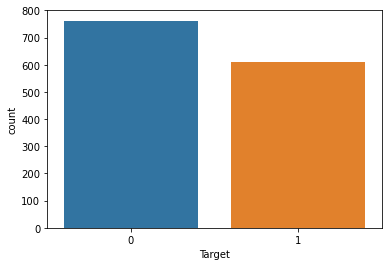

In [31]:
sns.countplot(df['Target'])

- Correlation between features

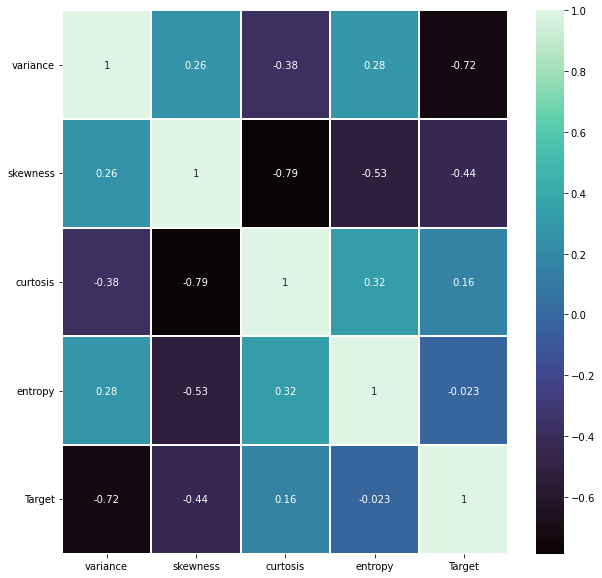

In [32]:
sns.heatmap(df.corr(),annot=True,cmap='mako',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [33]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


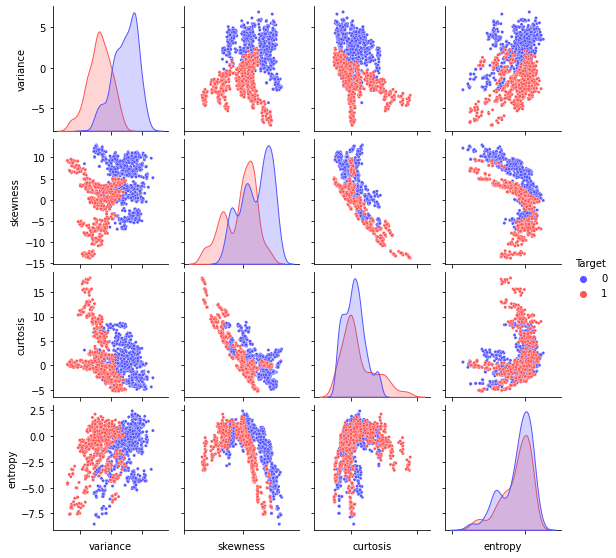

In [34]:
g = sns.pairplot(data=df, hue='Target', palette = 'seismic',
                 height=2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Target, Length: 1372, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=6)

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=6,n_estimators=200,criterion='gini',max_depth=4)

In [40]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=6)

In [41]:
y_pre = rf.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_pre,y_test)

0.9781553398058253